In [1]:
import pandas as pd

In [3]:
auck = pd.read_csv("../data/New Zealand/auckland_covid_zero.csv")
auck.drop(columns = "Unnamed: 0", inplace = True)
auck

,Text
0,@LesserMegadeath @southernscoop @NZStuff It is...
1,@rontkim \nall you are is a useless loudmouth....
2,Bloomberg; China needs to keep going with its ...
3,The thing that is surprising to me about the t...
4,when you get basically zero side effects from ...
...,...
1648,COVID-19: Patient Zero https://t.co/xjsZmfKdk1
1649,@BadKarma5555 @Ilhan So does Australia.....\nT...
1650,I don't buy the narrative that there are zero ...
1651,I’ve had three different conferences/national ...


In [4]:
wll = pd.read_csv("../data/New Zealand/wellington_covid_zero.csv")
wll.drop(columns = "Unnamed: 0", inplace = True)
wll

,Text
0,@hayesy316 The zero covid grifters dead cat bo...
1,So Australia has done an exhaustive search of ...
2,@calvinrobinson Reading comprehension isn’t yo...
3,Thank you Dan. DAN WOOTTON on Prime Minister ...
4,@LesserMegadeath @southernscoop @NZStuff It is...
...,...
1539,@realDonaldTrump But why all these drastic mea...
1540,This CCP foreign ministry official reckons ‘pa...
1541,I don't buy the narrative that there are zero ...
1542,I’ve had three different conferences/national ...


In [5]:
frames = [nz, wll]

result = pd.concat(frames)

In [6]:
result

,Text
0,@LesserMegadeath @southernscoop @NZStuff It is...
1,@rontkim \nall you are is a useless loudmouth....
2,Bloomberg; China needs to keep going with its ...
3,The thing that is surprising to me about the t...
4,when you get basically zero side effects from ...
...,...
1539,@realDonaldTrump But why all these drastic mea...
1540,This CCP foreign ministry official reckons ‘pa...
1541,I don't buy the narrative that there are zero ...
1542,I’ve had three different conferences/national ...


In [7]:
tweet_text_list = result['Text'].tolist()

tweet_text_list

['@LesserMegadeath @southernscoop @NZStuff It is like saying "how bad it is in Denmark when they have had over 3,000 deaths with Covid-19", but that is just real scaremongering, because their excess mortality is virtually zero: https://t.co/jBRfWVmPrM',
 '@rontkim \nall you are is a useless loudmouth.  Until you mention what Trump did to hurt NY during Covid; I have zero respect for you',
 'Bloomberg; China needs to keep going with its hardline Covid-zero policy to stamp out the disease because it is keeping the world’s supply chains flowing. https://t.co/x35BfCKDI6',
 'The thing that is surprising to me about the thread (subtweets are v compelling) is it suggests the Twitter folk supporting zero covid have been failing to represent Danish situation. Because I’ve been a fan of elimination, it’s a caution to check my own biases before retweeting.',
 'when you get basically zero side effects from all 3 covid shots: https://t.co/yayIC6ZCxE',
 'its such an honour to be art scene COVID pati

In [8]:
import numpy as np
import re

In [9]:
stopwords = ["for", "on", "an", "a", "of", "and", "in", "the", "to", "from",  "lockdown", "level", "new zealand", "will"]

def clean_tweet(tweet):
    if type(tweet) == np.float:
        return ""
    temp = tweet.lower()
    temp = re.sub("'", "", temp) # to avoid removing contractions in english
    temp = re.sub("@[A-Za-z0-9_]+","", temp)
    temp = re.sub("#[A-Za-z0-9_]+","", temp)
    temp = re.sub(r'http\S+', '', temp)
    temp = re.sub('[()!?]', ' ', temp)
    temp = re.sub('\[.*?\]',' ', temp)
    temp = re.sub("[^a-z0-9]"," ", temp)
    temp = temp.split()
    temp = [w for w in temp if not w in stopwords]
    temp = " ".join(word for word in temp)
    return temp

In [10]:
cleaned_tweets = [clean_tweet(tw) for tw in tweet_text_list]
cleaned_tweets

<ipython-input-9-773a689e3166>:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if type(tweet) == np.float:


['it is like saying how bad it is denmark when they have had over 3 000 deaths with covid 19 but that is just real scaremongering because their excess mortality is virtually zero',
 'all you are is useless loudmouth until you mention what trump did hurt ny during covid i have zero respect you',
 'bloomberg china needs keep going with its hardline covid zero policy stamp out disease because it is keeping world s supply chains flowing',
 'thing that is surprising me about thread subtweets are v compelling is it suggests twitter folk supporting zero covid have been failing represent danish situation because i ve been fan elimination it s caution check my own biases before retweeting',
 'when you get basically zero side effects all 3 covid shots',
 'its such honour be art scene covid patient zero',
 'but i mean if standard is you have endemic covid then we were doing very well very long time much better than anywhere else developed world except western australia we dropped ball recently bu

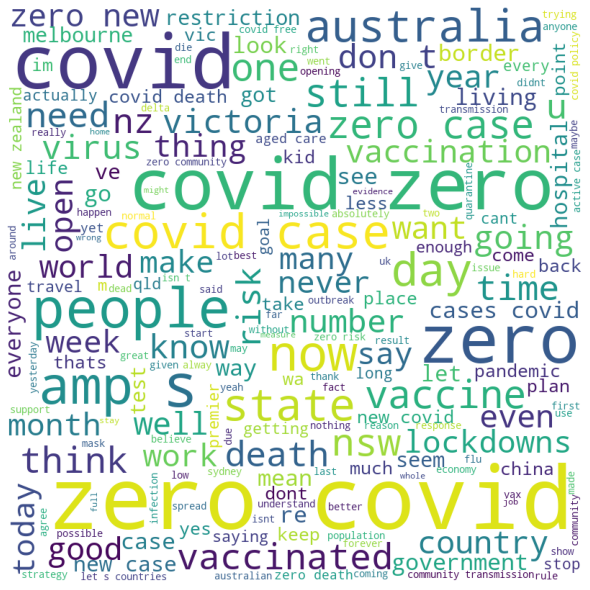

In [11]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

comment_words = ''

# iterate through list
for tweet_text in cleaned_tweets:
    # split the text into tokens
    tokens = tweet_text.split()
    # Append tokens to string comment_words
    comment_words += " ".join(tokens)+" "
    
# Let's make a word cloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                #stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()